<a href="https://colab.research.google.com/github/fajrulsantoso/Pcvk_2025-2026/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week1.ipynb!

## Pelajari Gemini API
Gemini API memberi Anda akses ke model Gemini yang dibuat oleh Google DeepMind. Sejak awal, model Gemini dirancang agar bersifat multimodal, sehingga Anda dapat melakukan analisis dengan lancar menggunakan teks, gambar, kode, dan audio.

**Ingin tahu cara memulai?**
*  Buka <a href="https://aistudio.google.com/">Google AI Studio</a> dan login dengan Akun Google Anda.
*  <a href="https://aistudio.google.com/app/apikey">Membuat kunci API</a>.
* Gunakan panduan memulai untuk <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb">Python</a>, atau panggil REST API menggunakan <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.

**Temukan kemampuan canggih Gemini**
*  Bereksperimenlah dengan <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb">output multimodal</a> Gemini, yang menggabungkan teks dan gambar secara iteratif.
*  Temukan <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb">Multimodal Live API</a> &#40;demo tersedia <a href="https://aistudio.google.com/live">di sini</a>&#41;.
*  Pelajari cara <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb&quot;">menganalisis gambar dan mendeteksi item di foto Anda</a> menggunakan Gemini &#40;tersedia juga bonus <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb">versi 3D</a>&#41;.
*  Dapatkan manfaat dari <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb">model pemikiran Gemini</a>, yang mampu menyelesaikan berbagai tugas kompleks dengan pemikiran internalnya.
      
**Pelajari kasus penggunaan yang kompleks**
*  Gunakan <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb">kemampuan grounding Gemini</a> untuk membuat laporan tentang perusahaan berdasarkan informasi yang dapat ditemukan model di internet.
*  Ekstrak <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb">invoice dan data formulir dari PDF</a> dengan cara yang terstruktur.
*  Buat <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb">ilustrasi berdasarkan seluruh buku</a> menggunakan jendela konteks besar Gemini dan Imagen.

Untuk mempelajari lebih lanjut, lihat <a href="https://github.com/google-gemini/cookbook">cookbook Gemini</a> atau buka <a href="https://ai.google.dev/docs/">dokumentasi Gemini API</a>.


Colab kini memiliki fitur AI yang didukung oleh <a href="https://gemini.google.com">Gemini</a>. Video berikut memberikan informasi tentang cara menggunakan fitur ini, baik jika Anda baru mengenal Python, atau sudah berpengalaman.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  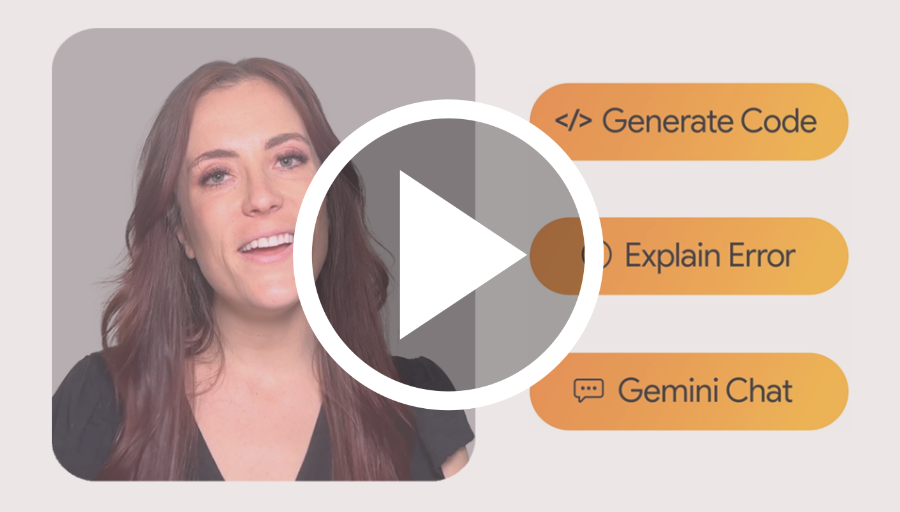
  </a>
</center>

In [7]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pyplot as plt

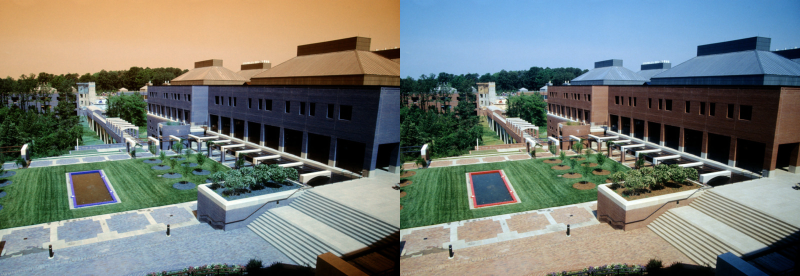

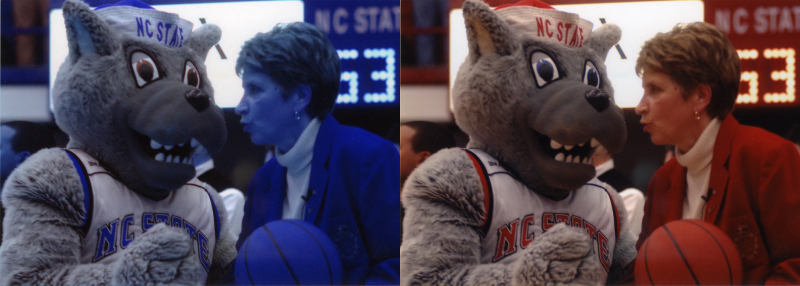

In [9]:
# Membuat list untuk menyimpan url dari beberapa image
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg"]

# baca dan tampilkan image
# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
    image = io.imread(url)         #read image
    image = cv.resize(image, (0,0), fx=0.5, fy=0.5)      #resize image to half size
    image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)      #convert color to RGB
    final_frame = cv.hconcat((image, image_2))      #concatenate image
    cv2_imshow(final_frame)      #show image
    print('\n')

resolusi image: tinggi x lebar =  286 x  400


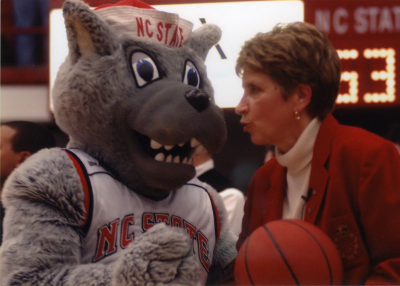

In [10]:
# melihat ukuran File image
tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("resolusi image: tinggi x lebar = ",tinggi, "x ",lebar)
cv2_imshow(image_2)

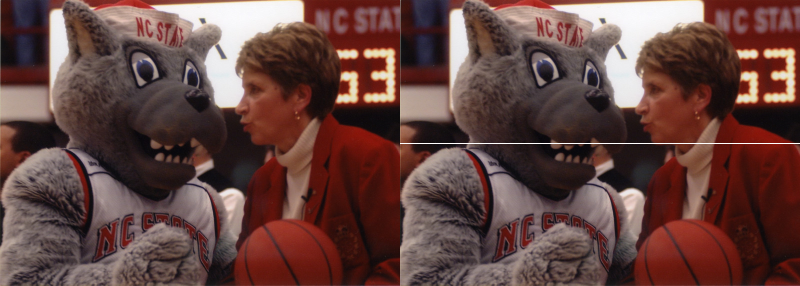

In [11]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#membuat garis horizontal ditengah image
for y in range(lebar):
    image_3[int((tinggi)/2),y] = [255,255,255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

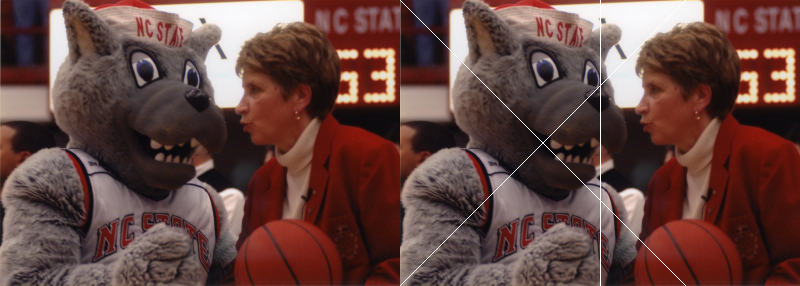

In [14]:
# Membuat salinan image untuk digambar garis
image_garis = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Dapatkan dimensi image
tinggi, lebar, _ = image_garis.shape

# Membuat garis vertikal di tengah image
for x in range(tinggi):
    image_garis[x, lebar // 2] = [255, 255, 255] # Warna putih

# Membuat garis menyilang diagonal
for i in range(lebar):
    # Garis dari kiri atas ke kanan bawah
    if i < tinggi:
        image_garis[i, i] = [255, 255, 255]

    # Garis dari kiri bawah ke kanan atas
    if lebar - 1 - i >= 0 and i < tinggi:
        image_garis[tinggi - 1 - i, i] = [255, 255, 255]

# Menggabungkan image asli dengan image yang sudah diberi garis
final_frame = cv.hconcat((image_2, image_garis))
cv2_imshow(final_frame)